In [17]:
#import the required libraries
import pandas as pd
import numpy as np

#load the data
dataset = pd.read_csv('Final.csv')
dataset.head()

,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B,Label
0,0.499272,0.530498,0.521569,0.032156,0.179320,-0.484763,-0.322512,7.417660,956.450061,0.010660,...,-0.407196,-0.696663,7.517717,946.369715,0.011527,0.075315,0.824158,0.001056,0.014440,0
1,0.450862,0.493341,0.482412,0.040108,0.200270,-0.025098,-1.355651,7.058108,360.687224,0.015127,...,0.163490,-1.162955,7.040838,359.933441,0.015140,0.094008,0.919477,0.002771,0.005492,0
2,0.490711,0.529387,0.552941,0.039453,0.198628,-0.561403,-0.793254,7.469795,604.175751,0.010409,...,-0.467573,-1.005314,7.497503,601.133165,0.010352,0.060593,0.896033,0.001661,0.009172,0
3,0.456121,0.516174,0.470588,0.058389,0.241638,-0.111255,-1.422784,7.603757,787.841958,0.011805,...,-0.061711,-1.496490,7.352011,770.710692,0.018813,0.113546,0.885132,0.001296,0.011759,0
4,0.666764,0.680847,0.701961,0.018978,0.137762,-0.641985,-0.495426,6.970347,147.902145,0.018236,...,-0.336407,-1.415606,7.252476,151.646691,0.017100,0.140658,0.974893,0.006552,0.002314,0


In [18]:
#classify the data into dependent and independent data
x = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]

x.head()

,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Std_B,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B
0,0.499272,0.530498,0.521569,0.032156,0.179320,-0.484763,-0.322512,7.417660,956.450061,0.010660,...,0.203257,-0.407196,-0.696663,7.517717,946.369715,0.011527,0.075315,0.824158,0.001056,0.014440
1,0.450862,0.493341,0.482412,0.040108,0.200270,-0.025098,-1.355651,7.058108,360.687224,0.015127,...,0.185545,0.163490,-1.162955,7.040838,359.933441,0.015140,0.094008,0.919477,0.002771,0.005492
2,0.490711,0.529387,0.552941,0.039453,0.198628,-0.561403,-0.793254,7.469795,604.175751,0.010409,...,0.210727,-0.467573,-1.005314,7.497503,601.133165,0.010352,0.060593,0.896033,0.001661,0.009172
3,0.456121,0.516174,0.470588,0.058389,0.241638,-0.111255,-1.422784,7.603757,787.841958,0.011805,...,0.227122,-0.061711,-1.496490,7.352011,770.710692,0.018813,0.113546,0.885132,0.001296,0.011759
4,0.666764,0.680847,0.701961,0.018978,0.137762,-0.641985,-0.495426,6.970347,147.902145,0.018236,...,0.215415,-0.336407,-1.415606,7.252476,151.646691,0.017100,0.140658,0.974893,0.006552,0.002314


In [19]:
#split data into training and testing
#import train_test_split function from sklearn library
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#scale the data to get good results
from sklearn.preprocessing import Normalizer

sc = Normalizer()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


#now lets predict the outcome
#import logistic regression classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#fit the model
lr.fit(x_train, y_train)

#predict the outcome
pred = lr.predict(x_test)

#lets now find the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy for main data is ", accuracy_score(y_test, pred))

#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

The accuracy for main data is  0.5904761904761905
[[  0 129]
 [  0 186]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       129
           1       0.59      1.00      0.74       186

    accuracy                           0.59       315
   macro avg       0.30      0.50      0.37       315
weighted avg       0.35      0.59      0.44       315



/home/uca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/uca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/uca/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/uca/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[  7 103]
 [ 18 135]]
The accuracy is  0.5399239543726235
              precision    recall  f1-score   support

           0       0.28      0.06      0.10       110
           1       0.57      0.88      0.69       153

    accuracy                           0.54       263
   macro avg       0.42      0.47      0.40       263
weighted avg       0.45      0.54      0.45       263



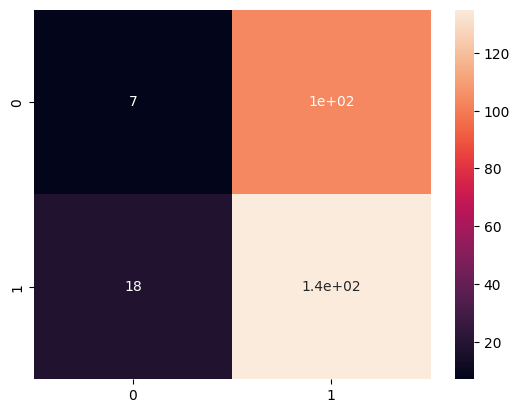

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  3 13:49:45 2020

@author: muhammad.fayaz
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('Final.csv')
X = dataset.iloc[:, 0:42].values
y = dataset.iloc[:, 42].values

#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(random_state=0)
classifer.fit(X_train,y_train)

y_pred= classifer.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
print(cm)

from sklearn.metrics import accuracy_score
print("The accuracy is ", accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))